In [1]:
#import some necessary librairies
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Column 설명
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius (체감온도)
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [3]:
train.head(13)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.840,14.395,81,0.000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.020,13.635,80,0.000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.020,13.635,80,0.000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.840,14.395,75,0.000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.840,14.395,75,0.000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.840,12.880,75,6.003,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.020,13.635,80,0.000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.200,12.880,86,0.000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.840,14.395,75,0.000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.120,17.425,76,0.000,8,6,14


In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000
mean,2.507,0.029,0.681,1.418,20.231,23.655,61.886,12.799,36.022,155.552,191.574
std,1.116,0.167,0.466,0.634,7.792,8.475,19.245,8.165,49.960,151.039,181.144
min,1.000,0.000,0.000,1.000,0.820,0.760,0.000,0.000,0.000,0.000,1.000
25%,2.000,0.000,0.000,1.000,13.940,16.665,47.000,7.002,4.000,36.000,42.000
50%,3.000,0.000,1.000,1.000,20.500,24.240,62.000,12.998,17.000,118.000,145.000
75%,4.000,0.000,1.000,2.000,26.240,31.060,77.000,16.998,49.000,222.000,284.000
max,4.000,1.000,1.000,4.000,41.000,45.455,100.000,56.997,367.000,886.000,977.000


In [5]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.660,11.365,56,26.003
1,2011-01-20 01:00:00,1,0,1,1,10.660,13.635,56,0.000
2,2011-01-20 02:00:00,1,0,1,1,10.660,13.635,56,0.000
3,2011-01-20 03:00:00,1,0,1,1,10.660,12.880,56,11.001
4,2011-01-20 04:00:00,1,0,1,1,10.660,12.880,56,11.001
5,2011-01-20 05:00:00,1,0,1,1,9.840,11.365,60,15.001
6,2011-01-20 06:00:00,1,0,1,1,9.020,10.605,60,15.001
7,2011-01-20 07:00:00,1,0,1,1,9.020,10.605,55,15.001
8,2011-01-20 08:00:00,1,0,1,1,9.020,10.605,55,19.001
9,2011-01-20 09:00:00,1,0,1,2,9.840,11.365,52,15.001


In [6]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


+) datetime에 대해서, 시간대 별로 자전거를 빌리려는 수요에 영향을 줄 수 있으므로 새로운 column 만들면? 

-> 시간대만 추출해서 01,02.......23  (00-23)

+) month도 추출 (1-12)

In [7]:
train['time'] = train['datetime'].map(lambda x: x[11:13]).astype(int)
test['time'] = test['datetime'].map(lambda x: x[11:13]).astype(int)
train['month'] = train['datetime'].map(lambda x: x[5:7]).astype(int)
test['month'] = test['datetime'].map(lambda x: x[5:7]).astype(int)

### numerical VS categorical values
* numerical: temp/atemp/humidity/windspeed/time
* categorical : season/holiday/workingday/weather/month

### numerical value

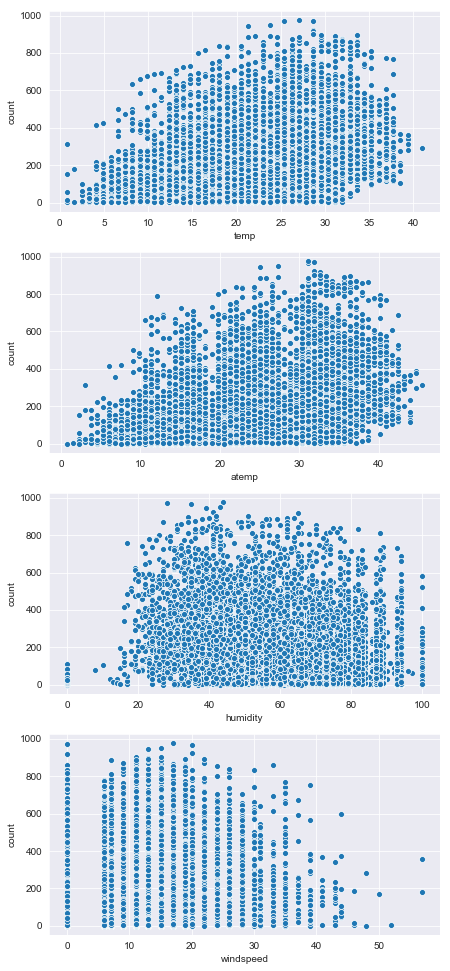

In [8]:
# 수치형 변수와 count 변수간 scatter plot
fig, axs = plt.subplots(4,1, figsize=(7,17))
sns.scatterplot(train['temp'],train['count'],ax=axs[0])
sns.scatterplot(train['atemp'],train['count'],ax=axs[1])
sns.scatterplot(train['humidity'],train['count'],ax=axs[2])
sns.scatterplot(train['windspeed'],train['count'],ax=axs[3])

In [9]:
# 수치형 변수들 skewness 살펴보기
numeric_feats = ['temp','atemp','humidity','windspeed']
# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
windspeed,0.589
temp,0.004
humidity,-0.086
atemp,-0.103


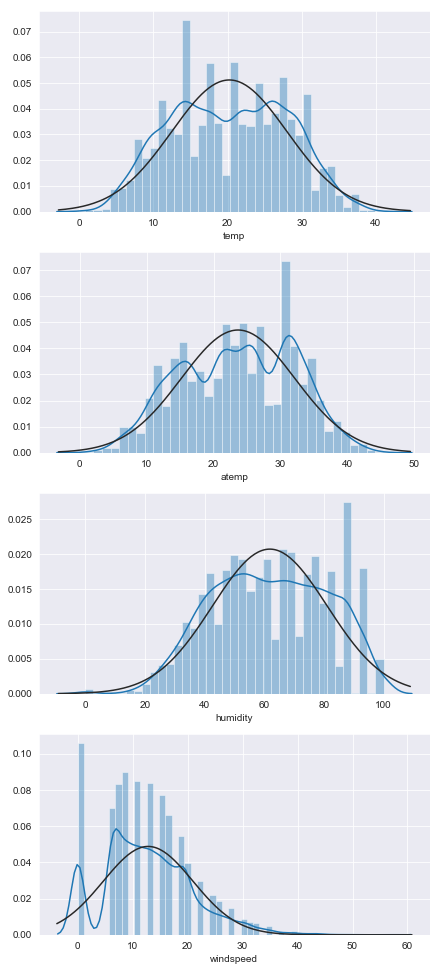

In [10]:
# 수치형 변수 displot
fig, axs = plt.subplots(4,1, figsize=(7,17))
sns.distplot(train['temp'],ax=axs[0],fit=norm)
sns.distplot(train['atemp'],ax=axs[1],fit=norm)
sns.distplot(train['humidity'],ax=axs[2],fit=norm)
sns.distplot(train['windspeed'],ax=axs[3],fit=norm)

### windspeed 범주형으로 바꾸기
##### 기존 데이터 생김새가 numerical이라고 보기엔 다소 어색한 분포도 보이므로, 4개 class 가진 범주형으로 변환
* 0-11 / 12-28 / 29~38 / 39-49 로 나누어 windspeed 강도에 따라 4가지 class로 구분
* (classification of wind speeds , US weather Bureau description) - link 추가하기
* 0: 0-11
* 1: 12-28
* 2: 29-38
* 3: 39~

In [11]:
train['windspeed_categ'] = train['windspeed'].apply(lambda x: 0 if x>=0 and x<=11 
                                                  else (1 if x>=12 and x<=28 else
                                                       (2 if x>=29 and x<=38 else 3)))
test['windspeed_categ'] = test['windspeed'].apply(lambda x: 0 if x>=0 and x<=11 
                                                  else (1 if x>=12 and x<=28 else
                                                       (2 if x>=29 and x<=38 else 3)))

### categorical values 
- season/holiday/workingday/weather/windspeed_categ/month
- barplot / boxplot

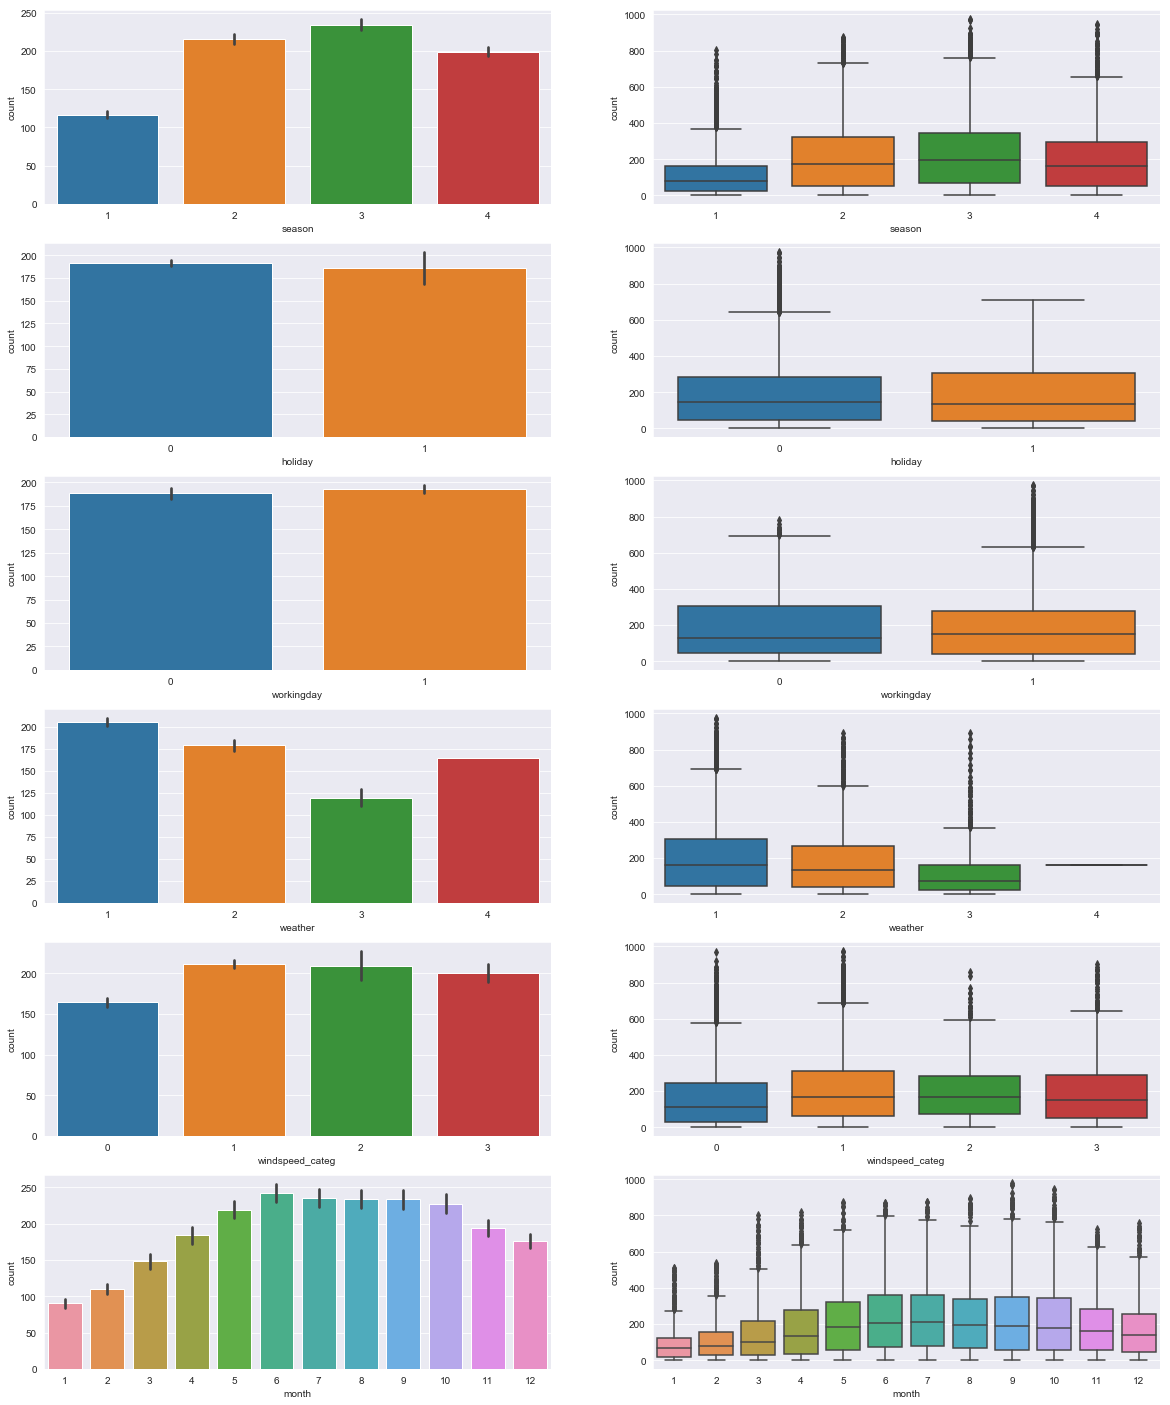

In [12]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 25)


sns.barplot(train["season"],train["count"],ax=axes[0][0])
sns.boxplot(train["season"],train["count"],ax=axes[0][1])
sns.barplot(train["holiday"],train["count"],ax=axes[1][0])
sns.boxplot(train["holiday"],train["count"],ax=axes[1][1])
sns.barplot(train["workingday"],train["count"],ax=axes[2][0])
sns.boxplot(train["workingday"],train["count"],ax=axes[2][1])
sns.barplot(train["weather"],train["count"],ax=axes[3][0])
sns.boxplot(train["weather"],train["count"],ax=axes[3][1])
sns.barplot(train["windspeed_categ"],train["count"],ax=axes[4][0])
sns.boxplot(train["windspeed_categ"],train["count"],ax=axes[4][1])
sns.barplot(train["month"],train["count"],ax=axes[5][0])
sns.boxplot(train["month"],train["count"],ax=axes[5][1])

### 상관관계
- temp - atemp 상관관계 0.985로 매우 높음. 하나 drop해주어야.. atemp(체감온도)를 drop하는 것이 나을듯


In [13]:
# casual / registered 변수는 없애줌(어차피 count에 합쳐져서 들어가므로)
train.drop(['casual','registered'],1).corr() #명목형 변수와 count (타겟변수) 간 상관관계가 없는거.. 그래서 decision tree에서는 one-hot을 해야한다...(?)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,month,windspeed_categ
season,1.000,0.029,-0.008,0.009,0.259,0.265,0.191,-0.147,0.163,-0.007,0.972,-0.060
holiday,0.029,1.000,-0.250,-0.007,0.000,-0.005,0.002,0.008,-0.005,-0.000,0.002,0.009
workingday,-0.008,-0.250,1.000,0.034,0.030,0.025,-0.011,0.013,0.012,0.003,-0.003,-0.008
weather,0.009,-0.007,0.034,1.000,-0.055,-0.055,0.406,0.007,-0.129,-0.023,0.012,0.023
temp,0.259,0.000,0.030,-0.055,1.000,0.985,-0.065,-0.018,0.394,0.145,0.258,0.013
atemp,0.265,-0.005,0.025,-0.055,0.985,1.000,-0.044,-0.057,0.390,0.140,0.264,-0.008
humidity,0.191,0.002,-0.011,0.406,-0.065,-0.044,1.000,-0.319,-0.317,-0.278,0.205,-0.167
windspeed,-0.147,0.008,0.013,0.007,-0.018,-0.057,-0.319,1.000,0.101,0.147,-0.150,0.498
count,0.163,-0.005,0.012,-0.129,0.394,0.390,-0.317,0.101,1.000,0.401,0.167,0.081
time,-0.007,-0.000,0.003,-0.023,0.145,0.140,-0.278,0.147,0.401,1.000,-0.007,0.102


In [14]:
train = train.drop(['casual','registered','atemp','season'],1)
test = test.drop(['atemp','season'],1)

In [15]:
train.head(10)

,datetime,holiday,workingday,weather,temp,humidity,windspeed,count,time,month,windspeed_categ
0,2011-01-01 00:00:00,0,0,1,9.840,81,0.000,16,0,1,0
1,2011-01-01 01:00:00,0,0,1,9.020,80,0.000,40,1,1,0
2,2011-01-01 02:00:00,0,0,1,9.020,80,0.000,32,2,1,0
3,2011-01-01 03:00:00,0,0,1,9.840,75,0.000,13,3,1,0
4,2011-01-01 04:00:00,0,0,1,9.840,75,0.000,1,4,1,0
5,2011-01-01 05:00:00,0,0,2,9.840,75,6.003,1,5,1,0
6,2011-01-01 06:00:00,0,0,1,9.020,80,0.000,2,6,1,0
7,2011-01-01 07:00:00,0,0,1,8.200,86,0.000,3,7,1,0
8,2011-01-01 08:00:00,0,0,1,9.840,75,0.000,8,8,1,0
9,2011-01-01 09:00:00,0,0,1,13.120,76,0.000,14,9,1,0


### target variable (count)

In [16]:
train['count'].describe()

count   10886.000
mean      191.574
std       181.144
min         1.000
25%        42.000
50%       145.000
75%       284.000
max       977.000
Name: count, dtype: float64

1.2420662117180776

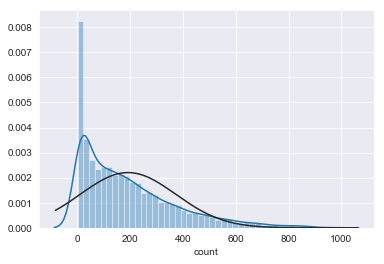

In [17]:
sns.distplot(train['count'] , fit=norm)
train['count'].skew()

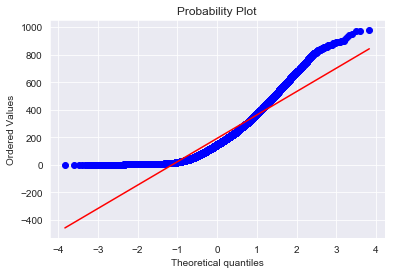

In [18]:
fig = plt.figure()
res = stats.probplot(train['count'], plot=plt)
plt.show()

### count 변수 skewness 조정해주기

-0.26399807747200205

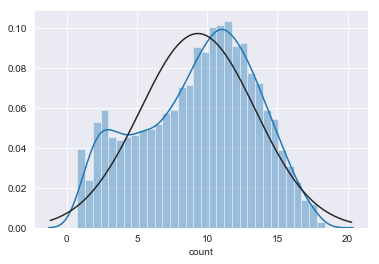

In [19]:
from scipy.special import boxcox1p
train["count"] = boxcox1p(train["count"], 0.25)
sns.distplot(train['count'] , fit=norm);
train['count'].skew()

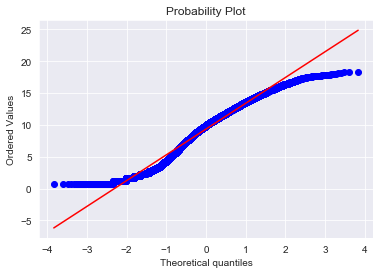

In [20]:
fig = plt.figure()
res = stats.probplot(train['count'], plot=plt)
plt.show()

### outlier 처리 (IQR)
* temp 변수 - IQR 처리해도 바뀌지 않음.
* humidity 변수 - outlier 처리 10886 ->10864 

In [21]:
Q1 = train['humidity'].quantile(0.25)
Q3 = train['humidity'].quantile(0.75)
IQR = Q3-Q1

In [22]:
train = train[(train['humidity']>(Q1-IQR*1.5))&(train['humidity']<(Q3+IQR*1.5))]
train

,datetime,holiday,workingday,weather,temp,humidity,windspeed,count,time,month,windspeed_categ
0,2011-01-01 00:00:00,0,0,1,9.840,81,0.000,4.122,0,1,0
1,2011-01-01 01:00:00,0,0,1,9.020,80,0.000,6.122,1,1,0
2,2011-01-01 02:00:00,0,0,1,9.020,80,0.000,5.587,2,1,0
3,2011-01-01 03:00:00,0,0,1,9.840,75,0.000,3.737,3,1,0
4,2011-01-01 04:00:00,0,0,1,9.840,75,0.000,0.757,4,1,0
5,2011-01-01 05:00:00,0,0,2,9.840,75,6.003,0.757,5,1,0
6,2011-01-01 06:00:00,0,0,1,9.020,80,0.000,1.264,6,1,0
7,2011-01-01 07:00:00,0,0,1,8.200,86,0.000,1.657,7,1,0
8,2011-01-01 08:00:00,0,0,1,9.840,75,0.000,2.928,8,1,0
9,2011-01-01 09:00:00,0,0,1,13.120,76,0.000,3.872,9,1,0


### feature engineering

In [23]:
from scipy.special import inv_boxcox1p
x_lin = train.drop(['datetime','count'],1)
x_tree = train.drop(['datetime','count'],1)
y_lin = train['count']
y_tree = train['count']

In [25]:
x_lin.isnull().sum() #결측치 없음 확인

holiday            0
workingday         0
weather            0
temp               0
humidity           0
windspeed          0
time               0
month              0
windspeed_categ    0
dtype: int64

### label VS one-hot encoding
- label : 수치에 있어 선후관계 유의미할 경우. (서열이 있는 경우)
- one-hot : season / holiday / workingday / weather / month 
- windspeed_categ : label encoding 
- time -> int

(holiday / working day 는 어차피 class 두개이므로 굳이 안해줘도 됨)

In [26]:
x_lin['weather'] = x_lin['weather'].apply(str)
x_lin['month'] = x_lin['month'].apply(str)
# test data도 진행
#test['holiday'] = test['holiday'].apply(str)
#test['month'] = test['month'].apply(str)


In [27]:
# one-hot
x_lin = pd.get_dummies(x_lin,columns=['weather','month'],drop_first=True)
#test = pd.get_dummies(test,columns=['weather','month'],drop_first=True) # one-hot

In [28]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 
lbl.fit(list(x_lin['windspeed_categ'].values)) 
x_lin['windspeed_categ'] = lbl.transform(list(x_lin['windspeed_categ'].values))
x_tree['windspeed_categ'] = lbl.transform(list(x_tree['windspeed_categ'].values))
test['windspeed_categ'] = lbl.transform(list(test['windspeed_categ'].values))

In [29]:
x_lin = x_lin.drop(['windspeed'],1)
x_tree = x_tree.drop(['windspeed'],1)
test = test.drop(['windspeed'],1)

### Scaling
* 스케일링은 데이터 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.
* 즉, 각 독립변수의 그 범위가 다르므로 모든 독립변수가 평균 0 분산 1이 되게끔 처리해주는 과정

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_lin_sc = sc.fit_transform(x_lin)
#sc_test = sc.fit_transform(test)

### Modeling
- 1. Linear Regression Model
- 2. Tree Based Model (decision tree / XGBoost)

### 1. Linear Regression

In [31]:
from sklearn.metrics import mean_squared_log_error
#train split
from sklearn.model_selection import train_test_split,cross_validate
x_lin_train,x_lin_test,y_lin_train,y_lin_test=train_test_split(x_lin_sc,y_lin,test_size=0.25,random_state=42)
x_tree_train,x_tree_test,y_tree_train,y_tree_test=train_test_split(x_tree,y_tree,test_size=0.25,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression(fit_intercept=True)
lin_regressor.fit(x_lin_train,y_lin_train)
lin_pred = lin_regressor.predict(x_lin_test)
print ("RMSLE Value For Linear Regression: ",(np.sqrt(mean_squared_log_error(inv_boxcox1p(lin_pred,0.25),inv_boxcox1p(y_lin_test,0.25)))))

RMSLE Value For Linear Regression:  1.0396953700484572


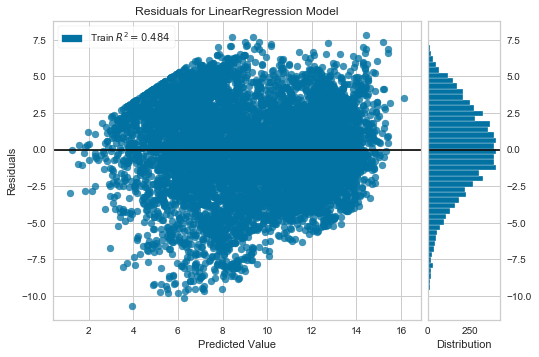

In [33]:
#check for residual distribution
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lin_regressor)
visualizer.fit(x_lin_train,y_lin_train)
visualizer.poof()

In [34]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(random_state=42)
RF_regressor.fit(x_tree_train,y_tree_train)
tree_pred = RF_regressor.predict(x_tree_test)
print ("RMSLE Value For RF Regression: ",(np.sqrt(mean_squared_log_error(tree_pred,y_tree_test))))

RMSLE Value For RF Regression:  0.16452493144867314


In [35]:
from xgboost import XGBRegressor
XG_regressor = XGBRegressor(random_state=42)
XG_regressor.fit(x_tree_train,y_tree_train)
XG_tree_pred = XG_regressor.predict(x_tree_test)
print ("RMSLE Value For XGB Regression: ",(np.sqrt(mean_squared_log_error(XG_tree_pred,y_tree_test))))

RMSLE Value For XGB Regression:  0.17748361724132564


- Param optimization

In [36]:
#RF
from sklearn.model_selection import GridSearchCV

no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=params_dict,scoring='neg_mean_squared_log_error',cv=10)
clf_rf.fit(x_tree_train,y_tree_train)
pred=clf_rf.predict(x_tree_test)
print((np.sqrt(mean_squared_log_error(pred,y_tree_test))))

0.1589409486236254


In [37]:
#XGB
params = [{'subsample':[i/10.0 for i in range(6,10)],'colsample_bytree':[i/10.0 for i in range(6,10)]}]
clf_xg=GridSearchCV(estimator=XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,random_state=42),param_grid=params,cv=10,n_jobs=-1,scoring='neg_mean_squared_log_error')
clf_xg.fit(x_tree_train,y_tree_train)
xg_pred=clf_xg.predict(x_tree_test)
print((np.sqrt(mean_squared_log_error(xg_pred,y_tree_test))))

0.1529060568072245


- Optimized results

In [38]:
print('RF_optimal_params : ',clf_rf.best_params_)
print('XGB_optimal_params : ',clf_xg.best_params_)

RF_optimal_params :  {'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}
XGB_optimal_params :  {'colsample_bytree': 0.9, 'subsample': 0.9}


In [39]:
#Optimized RF
rf=RandomForestRegressor(n_estimators=500,random_state=42,max_features='auto')
rf.fit(x_tree_train,y_tree_train)
imp_feature = rf.feature_importances_
imp_feature

array([0.00256607, 0.04765138, 0.01593598, 0.09752824, 0.04553787,
       0.74007514, 0.04218597, 0.00851934])

In [40]:
feats = {}
for feature, importance in zip(x_tree.columns, rf.feature_importances_):
    feats[feature] = importance

In [41]:
import operator
sorted_x = sorted(feats.items(), key=operator.itemgetter(1),reverse=True)
sorted_x

[('time', 0.7400751389683334),
 ('temp', 0.0975282446876336),
 ('workingday', 0.04765137905421937),
 ('humidity', 0.045537873772370334),
 ('month', 0.04218597308445765),
 ('weather', 0.01593598078778623),
 ('windspeed_categ', 0.008519342468267683),
 ('holiday', 0.002566067176931786)]

In [42]:
#XGB
xgrr=XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.9,subsample=0.9)
xgrr.fit(x_tree_train,y_tree_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.9, gamma=0.4, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=0.9)

In [43]:
#submission
pred=xgrr.predict(test.drop('datetime',axis=1))
d={'datetime':test['datetime'],'count':inv_boxcox1p(pred,0.25)}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False) # saving to a csv file for predictions on kaggle.

In [44]:
#submission
rf_pred=rf.predict(test.drop('datetime',axis=1))
d={'datetime':test['datetime'],'count':inv_boxcox1p(rf_pred,0.25)}
ans=pd.DataFrame(d)
ans.to_csv('answer_rf.csv',index=False) # saving to a csv file for predictions on kaggle.